In [1]:
import sys
import os
import numpy as np
import pandas as pd
import gmaps
from mpl_toolkits.basemap import Basemap, maskoceans

import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
from Fire_helpers import csv_to_df, df_to_heatmap
from settings_ECE180 import GOOGLE_API_KEY, data_path

%matplotlib inline
# Use this to set the env api key
os.environ['GOOGLE_API_KEY']= GOOGLE_API_KEY
gmaps.configure(api_key=os.getenv('GOOGLE_API_KEY'))

In [2]:
# create dataframe for each month with mean values
slice_data_dir = 'MM_CA_keep_landocean'
# select month
MM = "09"


cc=0
for dirpath, dnames, fnames in os.walk(os.path.join(data_path,slice_data_dir)):
    for f in fnames:
        if f.endswith(MM+".csv"):
            # load data
            if cc<1:
                df1 = pd.read_csv(os.path.join('.','data',slice_data_dir ,f))
                cc+=1
            else:
                df = pd.read_csv(os.path.join('.','data',slice_data_dir ,f))
                df1 = df1.append(df)

# get rid of land mask (replace 0.1 with 0, because 0.1 represents land values)
df1['mag'].replace(0.1,0, inplace=True)

# Calculate mean values
# Create a groupby variable that groups mag by lat and lon
df2 = df1.groupby(['lat', 'lon']).mean()


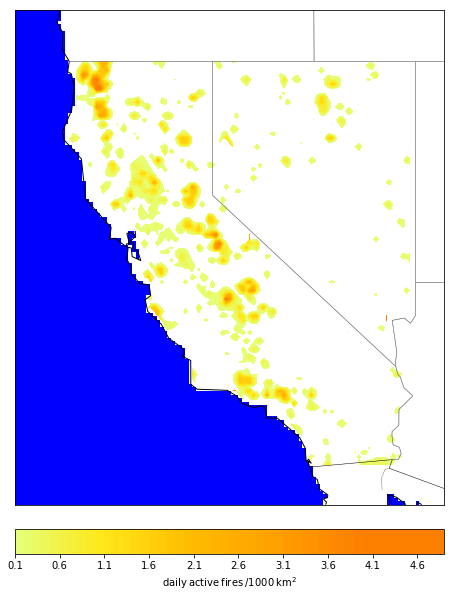

In [8]:
# plot data for a single month (create contour maps)
lon_mag = df1['lon'].values
lat_mag = df1['lat'].values
mag = df2['mag'].values

loncf = np.sort(list(set(lon_mag)))
latcf = np.sort(list(set(lat_mag)))
magcf = np.reshape(mag, (len(latcf),len(loncf)))

# create grid
xx, yy = np.meshgrid(loncf, latcf)
# mask oceans
magcf_new = maskoceans(xx,yy,magcf)

# lat_ts is the latitude of true scale.
# resolution = 'l' means use low resolution coastlines.
lat1 =  43.1
lon1 = -125.8
lat2 =  31.6
lon2 = -113.2

m = Basemap(projection='merc',llcrnrlat=lat2,urcrnrlat=lat1,\
            llcrnrlon=lon1,urcrnrlon=lon2,lat_ts=(lat2+lat1)/2,resolution='l')

plt.figure(figsize=(10,10))
# convert the lat/lon values to x/y projections.
xx, yy = m(*np.meshgrid(loncf, latcf))

cs = m.contourf(xx,yy,magcf_new, levels=np.arange(.1,5,.1), cmap=plt.cm.Wistia,  vmin=0.1, vmax=4 )
cbar = m.colorbar(cs,location='bottom',pad="5%",label=r'${\rm daily\: active\: fires \: /1000\:km^2}$')
# m.colorbar(label=r'${\rm daily\:\: active\:\: fires \: /1000\:km^2}$')

m.drawcoastlines()
m.drawstates(color='gray')
m.drawcountries()
m.drawlsmask(land_color='white',ocean_color='b')

plt.show()